y-y plots are a type of plot where two different lines and two data sets share the same x-axis but correspond to different y-axes. y-y plots are useful when two data sets share the same x-values, but their y-values are different by orders of magnitude. An example is an array of angles as a shared set of x-values and an array of the cosine as one set of y-values and tangent as another set of y-values. Cosine is always between -1 and 1, while tangent is between -infinity and infinity. 

## plotting cosine and tangent on the same set of axis

First, let's try and plot cosine and tangent on the same set of axis and see how the plot looks. We can construct the arrays to plot using numpy and build the plot with matplotlib. The code below creates a plot with cosine and tangent on a shared x-axis and shared y-axis.

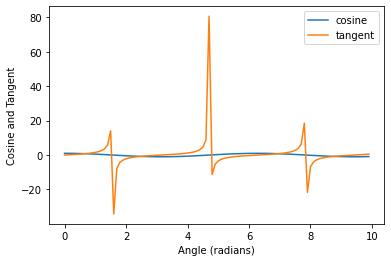

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,10,0.1)
y1 = np.cos(x)
y2 = np.tan(x)

fig, ax = plt.subplots()

ax.plot(x, y1)
ax.plot(x, y2)

ax.set_xlabel('Angle (radians)')
ax.set_ylabel('Cosine and Tangent')

ax.legend(['cosine','tangent'])

plt.show()

Note how the line for cosine looks almost flat. This is because the range of the tangent function is so large compared to the range of the cosine function. If we plot cosine and tangent on a different set of axes, we can see their ranges. The code below build a figure with two subplots, one subplot shows cosine the other subplot shows tangent.

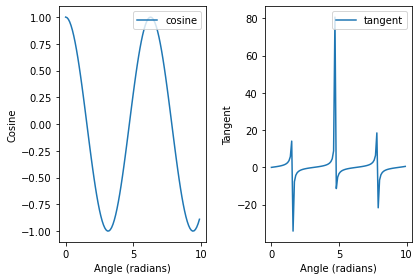

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,10,0.1)
y1 = np.cos(x)
y2 = np.tan(x)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)

ax1.plot(x, y1)
ax1.set_xlabel('Angle (radians)')
ax1.set_ylabel('Cosine')
ax1.legend(['cosine'], loc=1)

ax2.plot(x, y2)
ax2.set_xlabel('Angle (radians)')
ax2.set_ylabel('Tangent')
ax2.legend(['tangent'], loc=1)

plt.tight_layout()
plt.show()

We can see that the plot for cosine ranges from -1 to 1 on the y-axis and ranges from around -40 to around 80 on the y-axis (for our x-values in increments of 0.1 radians). 

## y-y plot

Let's build a y-y plot of the data. The key line is ```ax2 = ax1.twinx()```. This line creates a new axis object ```ax2``` that shares an x-axis with the first axis object ```ax1```.

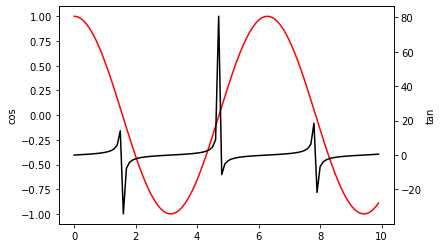

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,10,0.1)
y1 = np.cos(x)
y2 = np.tan(x)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1 = ax1.plot(x, y1, 'r')
ax1.set_ylabel("cos")

line2 = ax2.plot(x,y2,'k')
ax2.set_ylabel("tan")

plt.show()

## Add a legend to a y-y plot

Adding a legend to a y-y plot is a little tricky. If we try and call ```ax1.legend()``` and pass in a list of legend entries, we only get one line shown in our legend.

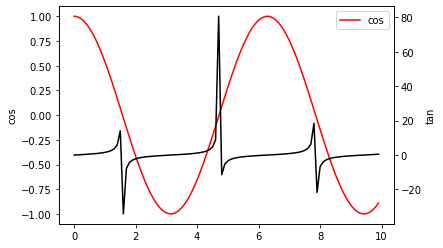

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,10,0.1)
y1 = np.cos(x)
y2 = np.tan(x)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x, y1, 'r')
ax1.set_ylabel("cos")

ax2.plot(x,y2,'k')
ax2.set_ylabel("tan")

ax1.legend(["cos","tan"])
plt.show()

To see an entry in the legend of a y-y plot, we need to save the line objects that are returned when we call ```ax.plot()```. These line objects can be added together and fed into ```ax.legend()```. A tricky little bit of the code below is ```ax1.get_ylabel()``` which pulls out the y-axis label we set for our ```ax1``` axes object.

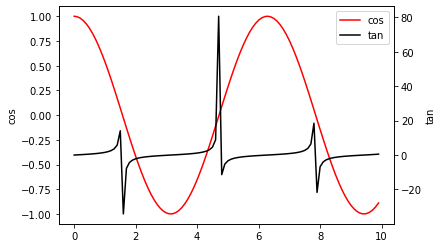

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,10,0.1)
y1 = np.cos(x)
y2 = np.tan(x)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1 = ax1.plot(x, y1, 'r')
ax1.set_ylabel("cos")

line2 = ax2.plot(x,y2,'k')
ax2.set_ylabel("tan")

lines = line1 + line2
labels = [ax1.get_ylabel(), ax2.get_ylabel()]

ax1.legend(lines, labels)
plt.show()

## Coloring the axes and tick labels

One last customization we can make to our y-y plot is to have the y-axis and the line that corresponds to that y-axis the same color. In the plot above, we can see which color line is which trig function, but we can't tell which y-axis that trig function's values corresond to. We can make our plot clearer by coloring the left-hand y-axis the same color as the cosine line that it correspnds to.

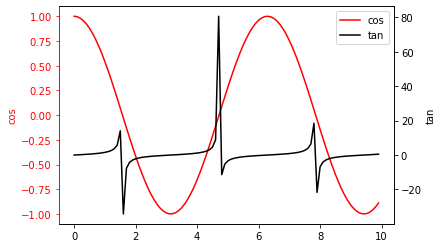

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,10,0.1)
y1 = np.cos(x)
y2 = np.tan(x)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1 = ax1.plot(x, y1, 'red')
ax1.set_ylabel("cos")
ax1.spines['left'].set_color('red')
ax1.yaxis.label.set_color('red')
ax1.tick_params(axis='y', colors='red')


line2 = ax2.plot(x,y2,'k')
ax2.set_ylabel("tan")
ax2.spines['left'].set_color('red')

lines = line1 + line2
labels = [ax1.get_ylabel(), ax2.get_ylabel()]

ax1.legend(lines, labels)
plt.show()

## Conclusion

In conclusion, y-y plots can be constructed with Python and Matplotlib using the ```ax.twinx()``` method. A couple customizations are useful. 

To add a legend to a y-y plot:

```
line1 = ax1.plot(x,y1)
line2 = ax2.plot(x,y2)
lines = line1 + line2
labels = [ax1.get_ylabel(), ax2.get_ylabel()]
ax1.legend(lines, labels)
```

To make a y-axis the same color as the line that corresponds to it:

```
ax1.plot(x, y1, 'red')
ax1.spines['left'].set_color('red')
ax1.yaxis.label.set_color('red')
ax1.tick_params(axis='y', colors='red')
```
